Linear Algebra is the topic of Chapter 12 of [A Guided Tour of Mathematical Methods for the Physical Sciences](http://www.cambridge.org/nz/academic/subjects/physics/mathematical-methods/guided-tour-mathematical-methods-physical-sciences-3rd-edition#KUoGXYx5FTwytcUg.97). In this notebook we treat linear regression on sea level measurements in the Auckland harbour as an application of linear algebra, as we solve the normal equations that describe linear regression. In the process, this notebook also has bearing on Inverse Problems (Chapter 22), and Statistics (Chapter 21). 

### Sea Level Data ###
Sea level measurements for the Auckland harbour can be downloaded [here](https://ndownloader.figshare.com/files/11235611) (thanks to Dr. John Hannah), using [pandas](https://pandas.pydata.org/). The value for each year is the average of many measurements taken throughout that year to obtain a mean value and standard deviation. We read in the data into a pandas data structure, convert it to a matrix, and extract the time (first column) and sea level measurement (second column):

In [3]:
import pandas as pd
url="https://auckland.figshare.com/ndownloader/files/21844113"
df = pd.read_csv(url,sep=',')
npdat =df.to_numpy()
time = npdat[:,0]
height = npdat[:,1]
print(height)
print(time)

[1.866 1.863 1.823 1.88  1.864 1.843 1.826 1.882 1.92  1.901 1.928 1.948
 1.903 1.873 1.833 1.875 1.928 1.923 1.905 1.873 1.921 1.866 1.93  1.893
 1.937 1.894 1.859 1.894 1.915 1.902 1.883 1.84  1.881 1.882 1.9   1.917
 1.895 1.91  1.998 1.952 1.891 1.898 1.888 1.932 1.89  1.901 1.941 1.988
 1.965 1.964 1.97  1.906 1.925 1.935 1.98  2.047 1.99  1.964 1.975 2.
 1.972 1.982 1.961 1.94  1.926 1.977 1.946 1.95  1.921 1.952 2.04  1.986
 1.955 2.012 1.992 1.985 1.952 1.959 1.983 1.97  1.969 1.958 1.928 1.964
 2.005 1.986 1.938 1.946 2.031 1.999 1.985 1.978 1.946 1.944 1.997 2.008
 1.978 1.987 2.065 2.065 2.088 2.042 2.06  2.026 2.048 2.034 2.014 2.054
 2.049 2.008 2.069 2.06  2.084 2.089 2.094 2.11  2.115 2.113]
[1899. 1900. 1901. 1903. 1904. 1905. 1906. 1907. 1908. 1909. 1910. 1911.
 1912. 1913. 1914. 1915. 1916. 1917. 1918. 1919. 1920. 1921. 1922. 1923.
 1924. 1925. 1926. 1927. 1928. 1929. 1930. 1931. 1932. 1933. 1934. 1935.
 1936. 1937. 1938. 1939. 1940. 1941. 1942. 1943. 1944. 1945. 1947

Next, we plot sea level in the Auckland Harbour, as a function of time:

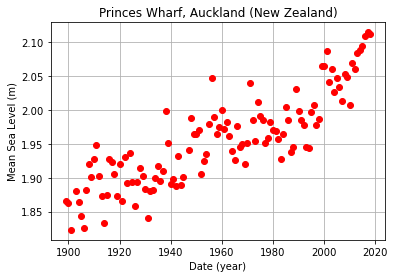

In [4]:
import matplotlib.pyplot as plt
plt.plot(time,height,'ro')
plt.grid()
plt.xlabel('Date (year)')
plt.ylabel('Mean Sea Level (m)')
plt.title('Princes Wharf, Auckland (New Zealand)')
plt.axis('tight')
plt.show()

### Linear Regression ###
There is an obvious spread in these measurements. You can read about the challenges of tidal gauge readings [here](http://www.fig.net/resources/monthly_articles/2010/hannah_july_2010.asp). Nevertheless, a trend of increasing depth seems clear. The rest of this notebook is an attempt of answering the question: "What is the best fitting linear equation to these data?"

Later, in Chapter 22, we will discuss Inverse Problems, where we address important questions about what it means to fit the data. Here, we are more concerned with minimizing the misfit between a vector of $n$ data points, $\mathbf{d}$, and those predicted by a model $\mathbf{m}$ that is represented by 2 variables: the slope and intercept of a straight line.

If we accept that these data can be represented by a straight line, then any datum at time $t$ would have a water depth $d = intercept + slope*t$. This would be true for all data, so we can write this in matrix form. If
$$ \mathbf{A}\mathbf{m}= \mathbf{d},$$ then 
$\mathbf{A} = \begin{pmatrix}1 & t_1 \\ \vdots & \vdots\\ 1& t_n\end{pmatrix}$, $\mathbf{m} = \begin{pmatrix} intercept \\ slope \end{pmatrix}$, and $\mathbf{d} = \begin{pmatrix} d_1 \\ \vdots\\ d_n\end{pmatrix}$ .

### Normal equations ###
Finding the slope and intercept that best fit the data in a least--squares sense is derived in many text books, including Section~22.2 of ours. Suffices here to say that we want to manipulate the linear system of equations so that we "free up" $\mathbf{m}$. If $\mathbf{A}$ had an inverse, we could multiply the left and right of $ \mathbf{A}\mathbf{m}= \mathbf{d}$ to achieve our goals. But $\mathbf{A}$ is not even square, so there is no chance of that! The next best scenario is to multiply left and right side of  $\mathbf{A}\mathbf{m}= \mathbf{d}$ by the transpose of $\mathbf{A}$:
$$ \mathbf{A}^T\mathbf{A}\mathbf{m} = \mathbf{A}^T\mathbf{d}.$$ 
These are the so-called *normal equations*, and we can rewrite this system as
$$ \tilde{\mathbf{A}}\mathbf{m} = \tilde{\mathbf{d}},$$
where $ \tilde{\mathbf{A}} = \mathbf{A}^T\mathbf{A}$ and $ \tilde{\mathbf{d}}= \mathbf{A}^T\mathbf{d}$. We could tackle the problem of solving for $\mathbf{m}$ with Singular Value Decomposition (SVD, see Section 12.6), for example. Python has many ways to solve this system of equations, and here is our function to find the best fitting line through a set of points:

In [5]:
import numpy as np # numerical tools
def my_linregress(t,y):
    ''' this linear regression function takes (t,y) data and returns best fitting slope and intercept only: 
    bells = whistles = 0'''
    
    a22 = np.dot(t,t)
    a12 = np.sum(t)
    a21 = a12
    a11 = len(t)
    Atilde = np.array([[a11,a12], [a21,a22]])
    
    d2 = np.dot(t,y)
    d1 = np.sum(y)
    dtilde = np.array([d1,d2])
    
    [intercept, slope] = np.linalg.solve(Atilde,dtilde)
    return intercept, slope

Take the time to confirm the elements of the vectors and matrix involved!! Once you are convinced, you can call this function:

In [6]:
intercept,slope = my_linregress(time, height)
print(intercept, slope)

-1.329917536176812 0.001677544292859273


And plot this best-fitting line through our data:

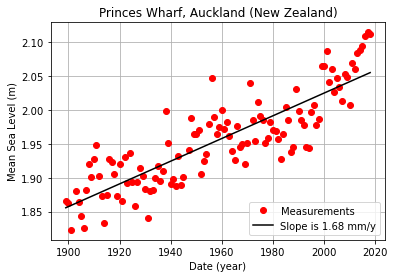

In [7]:
plt.plot(time,height,'ro')
plt.plot(time,intercept+slope*time,'k')
plt.grid()
plt.xlabel('Date (year)')
plt.ylabel('Mean Sea Level (m)')
plt.title('Princes Wharf, Auckland (New Zealand)')
plt.legend(['Measurements','Slope is {:.2f} mm/y'.format(1000*slope)],loc=4)
plt.axis('tight')
plt.show()

### Residuals or misfit ###
The line looks like a reasonable representation of the data, but how did we do from a quantitative point of view? Let's compute the mean and standard deviation of the residual values. These are the values of the water depth minus the best fitting straight line through the data:

In [8]:
residuals = height-(intercept + time*slope)
mu = np.mean(residuals)
std = np.std(residuals)
print(mu, std)

-4.083362649892525e-16 0.03487288641678912


The mean is practically zero, which shows that for all data we underestimate the observations just as much as we overestimate them. The standard devation turns out to be 3.4 cm. Why do you think this is? What factors can you think of that contribute to the standard deviation? The scientists involved in collecting these data estimate the standard error in each of these annual means for sea level in Auckland is 2.5 cm. 

If we were to feel that 3.4 cm is a "poor" fit, one could always fit the data better with a model that has more degrees of freedom. Does this experiment warrant a quadratic term? Or even higher-order polynomials? Maybe not over these 100 years of data, but if the rise is due to climate change and we have positive feedbacks, maybe we should account for that in our model. In any case:

**Given enough degrees of freedom in the model, we can fit the (any) data perfectly!**

### Linear regression "out of the box"

By the way, there are many ways to do linear regression, or more advanced polynomial fitting, in python. Here's one example from the stats functions in scipy:

In [9]:
from scipy.stats import linregress # linear regression function
slope, intercept, r_value, p_value, std_err = linregress(time,height)
print(slope, intercept, r_value, p_value)


0.001677544292859666 -1.3299175361775821 0.8566499935213178 3.9089191999608557e-35


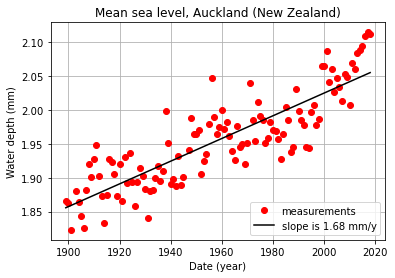

In [10]:
plt.plot(time,height,'ro')
plt.plot(time,intercept+slope*time,'k')
plt.grid()
plt.xlabel('Date (year)')
plt.ylabel('Water depth (mm)')
plt.title('Mean sea level, Auckland (New Zealand)')
plt.legend(['measurements','slope is {:.2f} mm/y'.format(1000*slope)],loc=4)
plt.axis('tight')
plt.show()

### Climate change? An exercise ###
Australian scientists confirm their historic data also support a [1.6 mm/y rise in sea level](https://en.wikipedia.org/wiki/Sea_level_rise) averaged over the last 100+ years. However, tidal gauge and satellite data from the last decade(s) indicate sea level may now be rising at double this rate! With this info, have another look at the Auckland data. Most sea level values in the 2000s falls *above* the regression line. It would require more than data from one tidal gauge to conclude this is significant, of course. Especially, when you learn that the Auckland tidal gauge has been moved site three times since 2000. However, for the sake of a fitting exercise, we encourage the reader to [fit these data with an exponent](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html), for example. Are the  residuals smaller than for a linear fit? Closer to the reported standard error in the data? 